✅ Data exported to 'user_behavior_anomaly_report.csv'.

🔍 Anomalous Users Detected:
     user_id  login_duration  tab_switches  keystroke_speed  idle_time  \
44   user_45        30.21478             0        352.75463   1.459514   
100  user_a1       120.00000            25         50.00000   0.000000   
101  user_a2         5.00000             0        500.00000  30.000000   
102  user_a3       180.00000            30         30.00000   1.000000   
103  user_a4         2.00000             1        600.00000  35.000000   
104  user_a5       130.00000            20         80.00000   0.500000   

     anomaly anomaly_label  
44        -1       Anomaly  
100       -1       Anomaly  
101       -1       Anomaly  
102       -1       Anomaly  
103       -1       Anomaly  
104       -1       Anomaly  


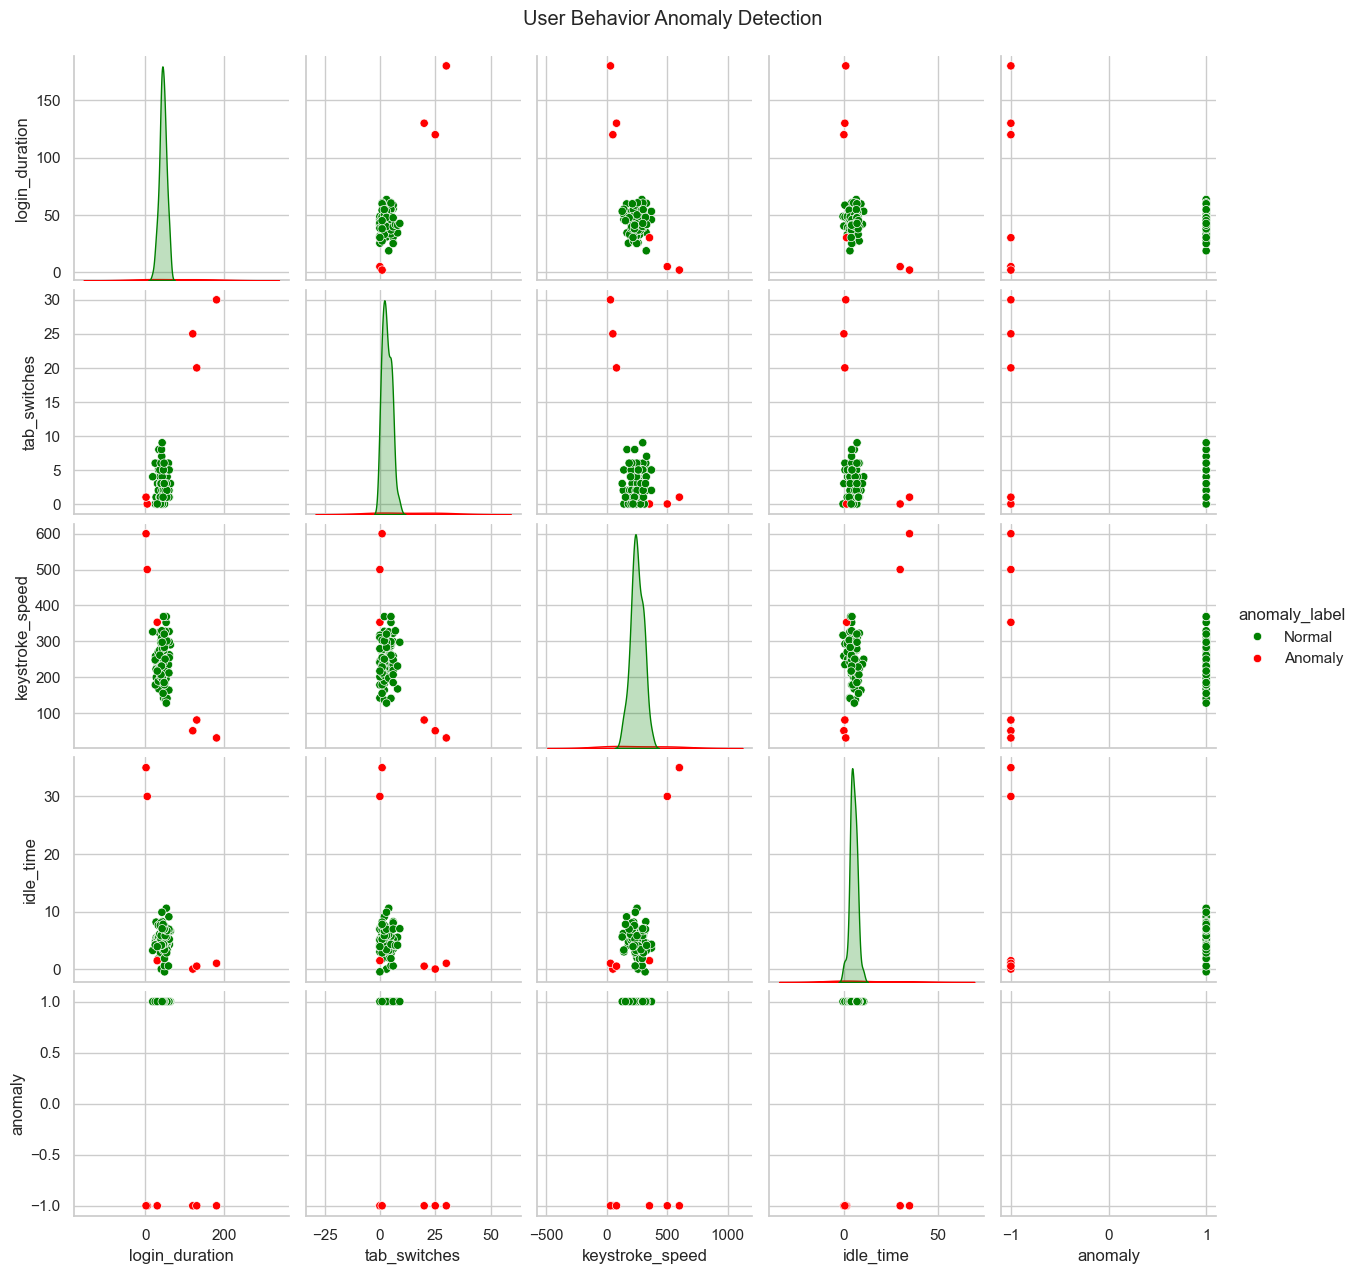

In [4]:
# -------------------- IMPORT LIBRARIES --------------------
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# -------------------- SIMULATE USER DATA --------------------
np.random.seed(42)

# Create 100 normal user session records
normal_users = {
    'user_id': [f"user_{i+1}" for i in range(100)],
    'login_duration': np.random.normal(loc=45, scale=10, size=100),     # minutes
    'tab_switches': np.random.poisson(lam=3, size=100),                 # count
    'keystroke_speed': np.random.normal(loc=250, scale=50, size=100),   # keys per minute
    'idle_time': np.random.normal(loc=5, scale=2, size=100)             # minutes
}
normal_df = pd.DataFrame(normal_users)

# Inject 5 anomalous records
anomalous_users = pd.DataFrame({
    'user_id': [f"user_a{i+1}" for i in range(5)],
    'login_duration': [120, 5, 180, 2, 130],
    'tab_switches': [25, 0, 30, 1, 20],
    'keystroke_speed': [50, 500, 30, 600, 80],
    'idle_time': [0, 30, 1, 35, 0.5]
})

# Combine normal + anomalous data
df = pd.concat([normal_df, anomalous_users], ignore_index=True)

# -------------------- PREPROCESSING --------------------
# Drop user_id for model training
X = df.drop(columns=['user_id'])

# Handle any negative idle_time values (optional)
X['idle_time'] = X['idle_time'].apply(lambda x: max(0, x))

# -------------------- ANOMALY DETECTION --------------------
# Initialize Isolation Forest
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
df['anomaly'] = model.fit_predict(X)

# Label the results
df['anomaly_label'] = df['anomaly'].map({1: 'Normal', -1: 'Anomaly'})

# -------------------- EXPORT RESULTS --------------------
# Save results to CSV (for BI use)
df.to_csv("user_behavior_anomaly_report.csv", index=False)
print("✅ Data exported to 'user_behavior_anomaly_report.csv'.")

# Show anomalies
print("\n🔍 Anomalous Users Detected:")
print(df[df['anomaly_label'] == 'Anomaly'])

# -------------------- VISUALIZATION --------------------
# Pairplot for visualization
sns.pairplot(df, hue='anomaly_label', diag_kind='kde', palette={'Normal': 'green', 'Anomaly': 'red'})
plt.suptitle("User Behavior Anomaly Detection", y=1.02)
plt.show()
